**Realizado por**: José Javier Díaz González

**Correo**: alu0101128894@ull.edu.es

## **Single Allocation Capacitated Facility Location Problem (SACFLP)**

Imaginemos que tenemos un conjunto $I$ de $n$ clientes y un conjunto $J$ de $m$ potenciales ubicaciones para unos servicios. Conocemos el costo $c_{ij}$ de servir al cliente $i$ desde la ubicación $j$. El problema de la **p-mediana** consiste en elegir **p** localizaciones para los servicios dentro del conjunto $J$, y asignar los clientes a los servicios, de forma que que coste total sea mínimo. 

Para formular el problema usamos dos conjuntos de variables de decisión: unas variables binarias $x_{ij}$ que indican si el cliente $i$ está asignado al servicio $j$, y unas variables binarias $y_j$ que toman valor 1 si abrimos la fábrica en $j$ y valor 0 si no lo hacemos.

La formulación lineal entera del problema de la p-mediana sería la siguiente:



\begin{align*}
\min & \sum_{j \in J} f_j y_j +\sum_{i \in I} \sum_{j \in J} c_{ij} x_{ij} &    \\
\text{s.t.:} & & \\
& \sum_{j \in J} x_{ij} =1  &  ∀  i \in I \\
& \sum_{i \in I} d_i x_{ij} \leq q_j y_j & ∀ j \in J  \\
%&   x_{ij} \leq d_i y_j              & ∀ i \in I, j \in J \\
& x_{ij} \in \{ 0,1 \}                     & ∀ i \in I, j \in J \\
& y_j \in \{ 0,1 \}                & ∀ j \in J
\end{align*}

Los datos del problema se generan aleatoriamente, usando las distancias euclídeas como costos de asignación.

In [1]:
EPS     = 0.0001

n = 5
customers = range(n)
m = 3
facilities = range(m)


#c[i][j] es el coste de servir la demanda del cliente i desde la fábrica j. Fijate que declaro cost como lista (por eso debo escribir cost[][])
cost  =  [[ 4,  6,  9],
          [ 5,  4,  7],
          [ 6,  3,  4],
          [ 8,  5,  3],
          [ 10,  8,  4]]


f = [ 1000, 1000, 1000] #fix cost for each facility
q = [ 500, 500, 500]    #capaciy of each facility
d = [ 80, 270, 250, 160, 180]  #demand of each customer


for i in customers:
  print('Demand of customer %d: = %d' % (i , d[i]))

for j in facilities:
  print('Facility %d: cost = %d, capacity = %d' % (j , f[j], q[j]))

for i in customers:
    for j in facilities:
            print('Cost: %d %d = %d' % (i,j,cost[i][j]))

print(facilities)
print(customers)    
print("cost:",cost)        


Demand of customer 0: = 80
Demand of customer 1: = 270
Demand of customer 2: = 250
Demand of customer 3: = 160
Demand of customer 4: = 180
Facility 0: cost = 1000, capacity = 500
Facility 1: cost = 1000, capacity = 500
Facility 2: cost = 1000, capacity = 500
Cost: 0 0 = 4
Cost: 0 1 = 6
Cost: 0 2 = 9
Cost: 1 0 = 5
Cost: 1 1 = 4
Cost: 1 2 = 7
Cost: 2 0 = 6
Cost: 2 1 = 3
Cost: 2 2 = 4
Cost: 3 0 = 8
Cost: 3 1 = 5
Cost: 3 2 = 3
Cost: 4 0 = 10
Cost: 4 1 = 8
Cost: 4 2 = 4
range(0, 3)
range(0, 5)
cost: [[4, 6, 9], [5, 4, 7], [6, 3, 4], [8, 5, 3], [10, 8, 4]]


In [2]:
!pip install ortools
from ortools.linear_solver import pywraplp


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
solver = pywraplp.Solver('ProblemaCFLP', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

# Variables
x = { (i,j) : solver.BoolVar('x[%i, %i]' % (i, j)) for i in customers for j in facilities } #binarias
y = { j : solver.BoolVar('y[%i]' % j) for j in facilities }

#Model

solver.Minimize(solver.Sum(f[j] * y[j] for j in facilities) + solver.Sum(cost[i][j] * x[i,j] for i in customers for j in facilities) )
[ solver.Add(solver.Sum(x[i,j] for j in facilities) == 1)  for i in customers ]
[ solver.Add(solver.Sum(d[i] * x[i,j] for i in customers) <= q[j]*y[j])  for j in facilities ]

solver.Solve()

# This prints the objetive value a the optimal solition
print('Costo total = ', solver.Objective().Value() ," in ", solver.WallTime()/1000, "seconds")

for j in facilities:
  if y[j].solution_value() > EPS:
    print('Open facility: %d. Fixed cost %d' % (j, f[j]))


for i in customers:
    for j in facilities:
        if x[i, j].solution_value() > EPS  :
          print('Customer %d asignado a la facility %d.  Demanda = %g. Costo = %g ' % (i,j,x[i,j].solution_value(),cost[i][j]*x[i,j].solution_value()))
            #print('Customer %d asignado a la facility %d.  Costo = %d' % (i,j,cost[i][j]))

Costo total =  2025.0  in  0.076 seconds
Open facility: 1. Fixed cost 1000
Open facility: 2. Fixed cost 1000
Customer 0 asignado a la facility 1.  Demanda = 1. Costo = 6 
Customer 1 asignado a la facility 2.  Demanda = 1. Costo = 7 
Customer 2 asignado a la facility 1.  Demanda = 1. Costo = 3 
Customer 3 asignado a la facility 1.  Demanda = 1. Costo = 5 
Customer 4 asignado a la facility 2.  Demanda = 1. Costo = 4 


Si generamos los datos del problema aleatoriamente, el código sería el siguiente:

Demands: {0: 5, 1: 2, 2: 2, 3: 6, 4: 2, 5: 1, 6: 5, 7: 4, 8: 6, 9: 8, 10: 7, 11: 5, 12: 2, 13: 7, 14: 6, 15: 10, 16: 4, 17: 4, 18: 4, 19: 5}
Fix costs: {0: 344, 1: 176, 2: 239}
Capacitiess: {0: 22, 1: 40, 2: 46}


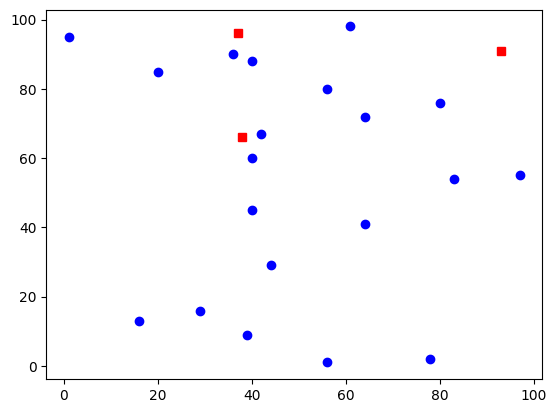

{(0, 0): 92, (0, 1): 36, (0, 2): 47, (1, 0): 36, (1, 1): 72, (1, 2): 60, (2, 0): 98, (2, 1): 80, (2, 2): 50, (3, 0): 109, (3, 1): 85, (3, 2): 57, (4, 0): 97, (4, 1): 96, (4, 2): 67, (5, 0): 53, (5, 1): 8, (5, 2): 22, (6, 0): 34, (6, 1): 36, (6, 2): 26, (7, 0): 38, (7, 1): 62, (7, 2): 46, (8, 0): 57, (8, 1): 6, (8, 2): 24, (9, 0): 32, (9, 1): 24, (9, 2): 39, (10, 0): 56, (10, 1): 29, (10, 2): 4, (11, 0): 73, (11, 1): 20, (11, 2): 26, (12, 0): 70, (12, 1): 51, (12, 2): 21, (13, 0): 79, (13, 1): 67, (13, 2): 37, (14, 0): 19, (14, 1): 47, (14, 2): 43, (15, 0): 61, (15, 1): 36, (15, 2): 6, (16, 0): 90, (16, 1): 102, (16, 2): 75, (17, 0): 57, (17, 1): 61, (17, 2): 36, (18, 0): 98, (18, 1): 87, (18, 2): 57, (19, 0): 38, (19, 1): 24, (19, 2): 22}


In [6]:
n = 20
customers = range(n)
m = 3
facilities = range(m)

import random
random.seed(54613)

#Demandas, costos y capacidades
d = { i : random.randint(1,10) for i in customers }
q = { j : random.randint(10,60) for j in facilities }    ##Con q máximo 50 sale no factible. Con 90 sí tiene solución.
f = { j : random.randint(100,500) for j in facilities }

print("Demands:",d)
print("Fix costs:",f)
print("Capacitiess:",q)

#Coordenadas de los customers y facilities en el plano
customers_coor   = [(random.randint(0,100),random.randint(0,100)) for i in customers]
facilities_coor   = [(random.randint(0,100),random.randint(0,100)) for j in facilities]

import math
def euc_dist(customers_coor, facilities_coor, i, j):
    dx = customers_coor[i][0] - facilities_coor[j][0]
    dy = customers_coor[i][1] - facilities_coor[j][1]
    return math.floor(math.sqrt(dx*dx + dy*dy))

cost = {(i,j) : euc_dist(customers_coor, facilities_coor, i, j) for i in customers for j in facilities} #diccionario, no lista


import matplotlib.pyplot as plt
def dibuja(selected):                
    plt.plot([p[0] for p in customers_coor], [p[1] for p in customers_coor], 'bo')
    plt.plot([p[0] for p in facilities_coor], [p[1] for p in facilities_coor], 'rs') 
    for (i,j) in selected: #dibuja las asignaciones
        plt.plot([customers_coor[i][0],facilities_coor[j][0]], [customers_coor[i][1],facilities_coor[j][1]], 'g-')
    plt.show()

dibuja({})

print(cost)


In [7]:
!pip install ortools
from ortools.linear_solver import pywraplp


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Costo total =  1429.0  in  0.053 seconds
Open facility: 0. Fixed cost 344
Open facility: 1. Fixed cost 176
Open facility: 2. Fixed cost 239
Customer 0 asignado a la facility 1.  Demanda = 1. Costo = 36 
Customer 1 asignado a la facility 0.  Demanda = 1. Costo = 36 
Customer 2 asignado a la facility 2.  Demanda = 1. Costo = 50 
Customer 3 asignado a la facility 2.  Demanda = 1. Costo = 57 
Customer 4 asignado a la facility 2.  Demanda = 1. Costo = 67 
Customer 5 asignado a la facility 1.  Demanda = 1. Costo = 8 
Customer 6 asignado a la facility 0.  Demanda = 1. Costo = 34 
Customer 7 asignado a la facility 0.  Demanda = 1. Costo = 38 
Customer 8 asignado a la facility 1.  Demanda = 1. Costo = 6 
Customer 9 asignado a la facility 1.  Demanda = 1. Costo = 24 
Customer 10 asignado a la facility 2.  Demanda = 1. Costo = 4 
Customer 11 asignado a la facility 1.  Demanda = 1. Costo = 20 
Customer 12 asignado a la facility 2.  Demanda = 1. Costo = 21 
Customer 13 asignado a la facility 2.  De

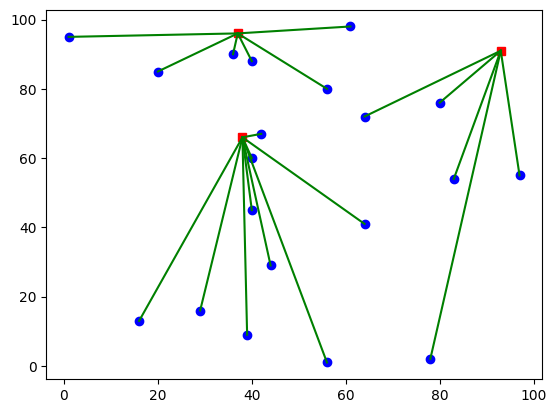

In [8]:
solver = pywraplp.Solver('ProblemaCFLPrand', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

# Variables: 
#x[i,j] = cantidad de la demanda del cliente i satisfecha por la facility j, variable continua.
x = { (i,j) : solver.BoolVar('x[%i, %i]' % (i, j)) for i in customers for j in facilities } #binarias
y = { j : solver.BoolVar('y[%i]' % j) for j in facilities } #binarias

#Model
solver.Minimize(solver.Sum(f[j] * y[j] for j in facilities) + solver.Sum(cost[i,j] * x[i,j] for i in customers for j in facilities) )
[ solver.Add(solver.Sum(x[i,j] for j in facilities) == 1)  for i in customers ]
[ solver.Add(solver.Sum(d[i] * x[i,j] for i in customers) <= q[j]*y[j])  for j in facilities ]

final_status = solver.Solve()

if final_status == solver.OPTIMAL:   
    # This prints the objetive value a the optimal solition
    print('Costo total = ', solver.Objective().Value() ," in ", solver.WallTime()/1000, "seconds")

    for j in facilities:
      if y[j].solution_value() > EPS:
        print('Open facility: %d. Fixed cost %d' % (j, f[j]))

    for i in customers:
        for j in facilities:
            if x[i, j].solution_value() > EPS  :
              print('Customer %d asignado a la facility %d.  Demanda = %g. Costo = %g ' % (i,j,x[i,j].solution_value(),cost[i,j]*x[i,j].solution_value()))

    selected = [(i,j) for i,j in cost.keys() if x[i, j].solution_value() > EPS]
    dibuja(selected)     


elif final_status == solver.INFEASIBLE:    
  print('PROBLEMA NO FACTIBLE')      

else:
  print('LA OPTIMIZACIÓN ACABÓ CON EL STATUS:')
  print(solver_status)  
